In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# World Happiness Report 2021

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
whr2021 = pd.read_csv("/content/drive/Shareddrives/IST652|738 Happiness Scripting Project/world-happiness-report-2021.csv")
whr2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


To make the 2021 dataset similar to 2019 we need to remove excess columns not provided in 2019 in addition to only maintaining those with the same metrics as used in 2019

In [ ]:
whr2021 = whr2021.drop(columns=['Ladder score in Dystopia', 'Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia','Dystopia + residual'])

Rename "explained by" columns so they are representative of the original names

In [ ]:
whr2021 = whr2021.rename(columns={"Explained by: Log GDP per capita": "GDP per capita", "Explained by: Social support": "Social support","Explained by: Healthy life expectancy": "Healthy life expectancy","Explained by: Freedom to make life choices": "Freedom to make life choices", "Explained by: Generosity": "Generosity","Explained by: Perceptions of corruption": "Perceptions of corruption"})
whr2021

,Country name,Regional indicator,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,1.446,1.106,0.741,0.691,0.124,0.481
1,Denmark,Western Europe,7.620,1.502,1.108,0.763,0.686,0.208,0.485
2,Switzerland,Western Europe,7.571,1.566,1.079,0.816,0.653,0.204,0.413
3,Iceland,Western Europe,7.554,1.482,1.172,0.772,0.698,0.293,0.170
4,Netherlands,Western Europe,7.464,1.501,1.079,0.753,0.647,0.302,0.384
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.451,0.731,0.007,0.405,0.103,0.015
145,Botswana,Sub-Saharan Africa,3.467,1.099,0.724,0.340,0.539,0.027,0.088
146,Rwanda,Sub-Saharan Africa,3.415,0.364,0.202,0.407,0.627,0.227,0.493
147,Zimbabwe,Sub-Saharan Africa,3.145,0.457,0.649,0.243,0.359,0.157,0.075


In [ ]:
happiest2021 = whr2021.groupby(['Country name','Healthy life expectancy','Freedom to make life choices','Generosity'])['Ladder score'].mean().sort_values(ascending=False)[:10]
leasthappy2021 = whr2021.groupby(['Country name','Healthy life expectancy','Freedom to make life choices','Generosity'])['Ladder score'].mean().sort_values(ascending=True)[:10]

Which countries are the most and least happy in 2021

In [ ]:
happiest2021

Country name  Healthy life expectancy  Freedom to make life choices  Generosity
Finland       0.741                    0.691                         0.124         7.842
Denmark       0.763                    0.686                         0.208         7.620
Switzerland   0.816                    0.653                         0.204         7.571
Iceland       0.772                    0.698                         0.293         7.554
Netherlands   0.753                    0.647                         0.302         7.464
Norway        0.782                    0.703                         0.249         7.392
Sweden        0.763                    0.685                         0.244         7.363
Luxembourg    0.760                    0.639                         0.166         7.324
New Zealand   0.785                    0.665                         0.276         7.277
Austria       0.782                    0.640                         0.215         7.268
Name: Ladder score, dtype: flo

In [ ]:
leasthappy2021

Country name  Healthy life expectancy  Freedom to make life choices  Generosity
Afghanistan   0.126                    0.000                         0.122         2.523
Zimbabwe      0.243                    0.359                         0.157         3.145
Rwanda        0.407                    0.627                         0.227         3.415
Botswana      0.340                    0.539                         0.027         3.467
Lesotho       0.007                    0.405                         0.103         3.512
Malawi        0.298                    0.484                         0.213         3.600
Haiti         0.227                    0.257                         0.463         3.615
Tanzania      0.300                    0.549                         0.307         3.623
Yemen         0.272                    0.268                         0.092         3.658
Burundi       0.155                    0.298                         0.172         3.775
Name: Ladder score, dtype: flo

Which countries have the longest and shortest life expectancies?

In [ ]:
longlife2021 = whr2021.groupby(['Country name','Freedom to make life choices','Generosity','Ladder score'])['Healthy life expectancy'].mean().sort_values(ascending=False)[:10]
shortlife2021 = whr2021.groupby(['Country name','Healthy life expectancy','Freedom to make life choices','Generosity', 'Ladder score'])['Healthy life expectancy'].mean().sort_values(ascending=True)[:10]

In [ ]:
longlife2021

Country name               Freedom to make life choices  Generosity  Ladder score
Singapore                  0.664                         0.176       6.377           0.897
Hong Kong S.A.R. of China  0.408                         0.232       5.477           0.893
Japan                      0.504                         0.020       5.940           0.838
Spain                      0.462                         0.135       6.491           0.826
Switzerland                0.653                         0.204       7.571           0.816
France                     0.536                         0.092       6.690           0.804
Australia                  0.647                         0.291       7.183           0.801
South Korea                0.353                         0.134       5.845           0.801
Cyprus                     0.464                         0.178       6.223           0.801
North Cyprus               0.503                         0.196       5.536           0.801
Name: He

In [ ]:
shortlife2021

Country name  Healthy life expectancy  Freedom to make life choices  Generosity  Ladder score
Chad          0.000                    0.240                         0.215       4.355           0.000
Lesotho       0.007                    0.405                         0.103       3.512           0.007
Nigeria       0.051                    0.433                         0.212       4.759           0.051
Ivory Coast   0.052                    0.438                         0.177       5.306           0.052
Swaziland     0.074                    0.323                         0.067       4.308           0.074
Sierra Leone  0.100                    0.408                         0.243       3.849           0.100
Mali          0.110                    0.384                         0.164       4.723           0.110
Afghanistan   0.126                    0.000                         0.122       2.523           0.126
Burundi       0.155                    0.298                         0.172       3

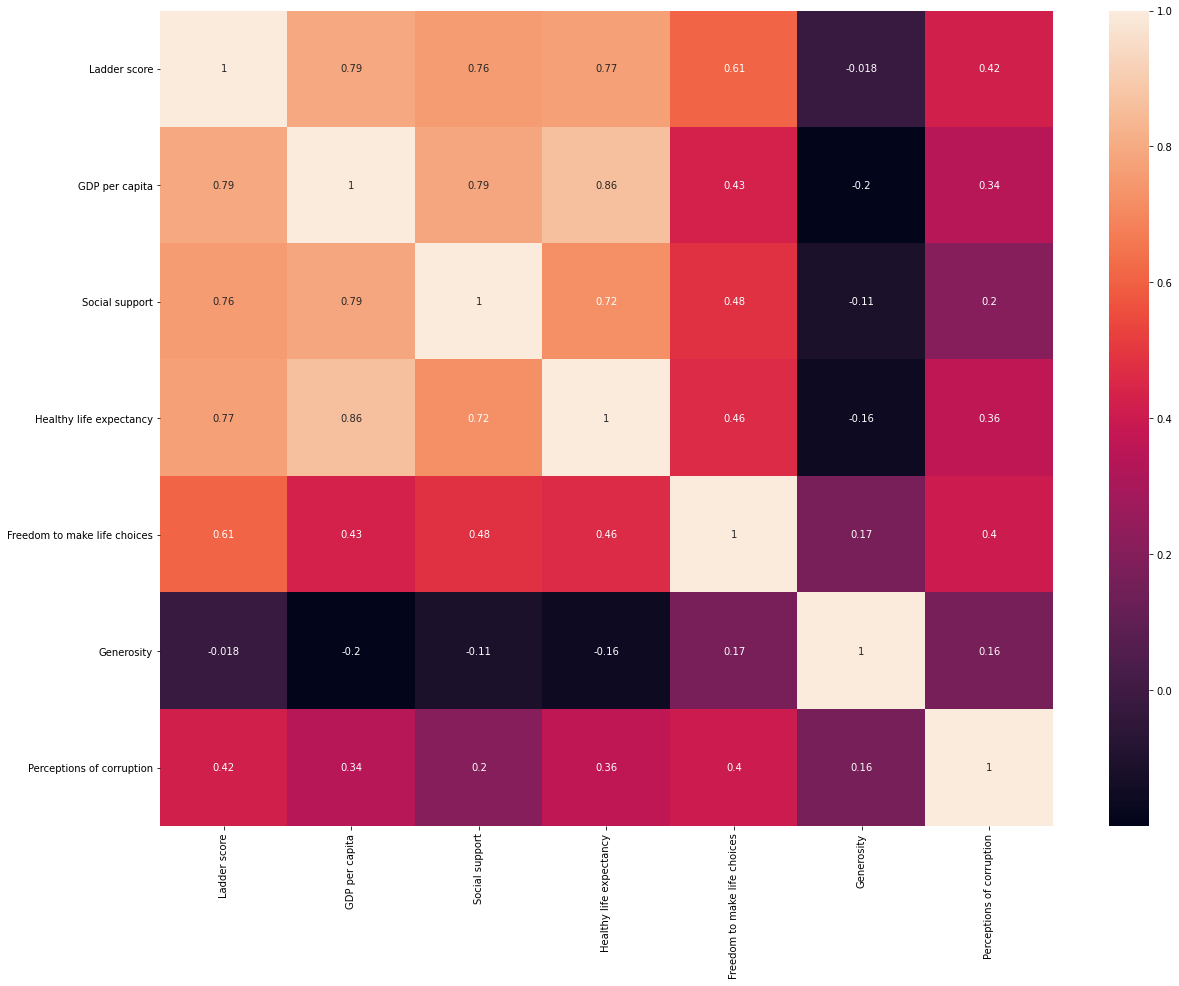

In [ ]:
corrMatrix = whr2021.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

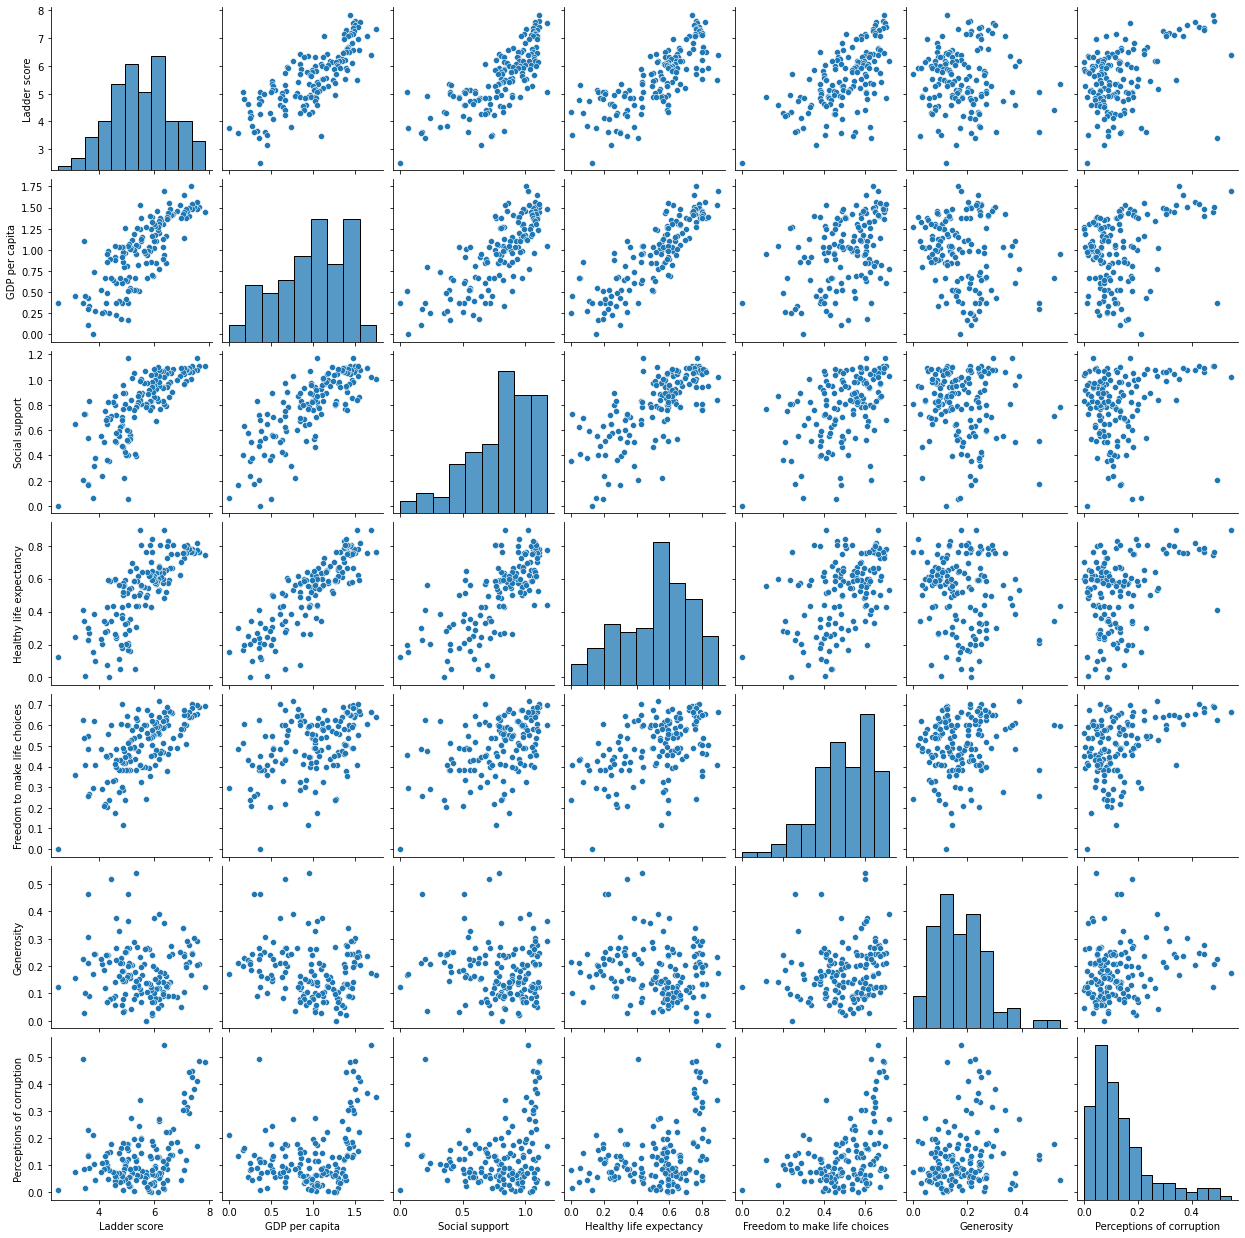

In [ ]:
sns.pairplot(whr2021)

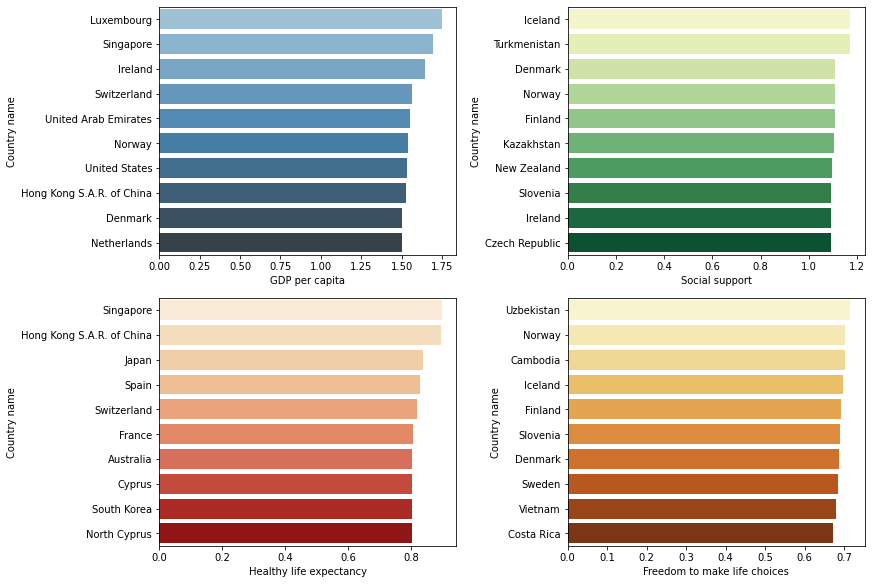

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country name',data=whr2021.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country name',data=whr2021.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country name',data=whr2021.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country name',data=whr2021.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = whr2021['Country name'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = whr2021['Ladder score'], 
           text = whr2021['Country name'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Country with region to see who is most and least happy

In [ ]:
happywithregion2021 = whr2021.groupby(['Regional indicator','Country name'])['Ladder score'].mean().sort_values(ascending=False)[:10]
happywithregion2021

Regional indicator     Country name
Western Europe         Finland         7.842
                       Denmark         7.620
                       Switzerland     7.571
                       Iceland         7.554
                       Netherlands     7.464
                       Norway          7.392
                       Sweden          7.363
                       Luxembourg      7.324
North America and ANZ  New Zealand     7.277
Western Europe         Austria         7.268
Name: Ladder score, dtype: float64

In [ ]:
unhappywithregion2021 = whr2021.groupby(['Regional indicator','Country name'])['Ladder score'].mean().sort_values(ascending=True)[:10]
unhappywithregion2021

Regional indicator            Country name
South Asia                    Afghanistan     2.523
Sub-Saharan Africa            Zimbabwe        3.145
                              Rwanda          3.415
                              Botswana        3.467
                              Lesotho         3.512
                              Malawi          3.600
Latin America and Caribbean   Haiti           3.615
Sub-Saharan Africa            Tanzania        3.623
Middle East and North Africa  Yemen           3.658
Sub-Saharan Africa            Burundi         3.775
Name: Ladder score, dtype: float64

Most happy ranked by combined countries in region.. You would have assumed that Western Europe would have been the top region since 9 of 10 of those countries were in the top 10! But with only New Zealand being in the top 10, lets look more into the rest of that region to see how the United States fits in with this region.

In [ ]:
happyregion2021 = whr2021.groupby(['Regional indicator'])['Ladder score'].mean().sort_values(ascending=False)[:10]
happyregion2021

Regional indicator
North America and ANZ                 7.128500
Western Europe                        6.914905
Central and Eastern Europe            5.984765
Latin America and Caribbean           5.908050
East Asia                             5.810333
Commonwealth of Independent States    5.467000
Southeast Asia                        5.407556
Middle East and North Africa          5.219765
Sub-Saharan Africa                    4.494472
South Asia                            4.441857
Name: Ladder score, dtype: float64

In [ ]:
NA2021 = whr2021.loc[whr2021['Regional indicator'] == 'North America and ANZ']

In [ ]:
nahappiest2021 = NA2021.groupby(['Country name','Logged GDP per capita', 'Social support', 'Healthy life expectancy',])['Ladder score'].mean().sort_values(ascending=False)
nahappiest2021

Country name               7.277
Logged GDP per capita      7.183
Social support             7.103
Healthy life expectancy    6.951
Name: Ladder score, dtype: float64

The United States is the least happy country in North America and the ANZ region despite having the highest GDP, it had the lowest social support and healthy life expectancy. Also what is interesting is that the United States had the lowest "Freedom to make life choices". Re-evaluate the correlation matrix by focusing only on the NA and ANZ region to see what has a positive correlation to happiness score and make sure each item was captured. Seems that the US threw off the GDP correlation. 

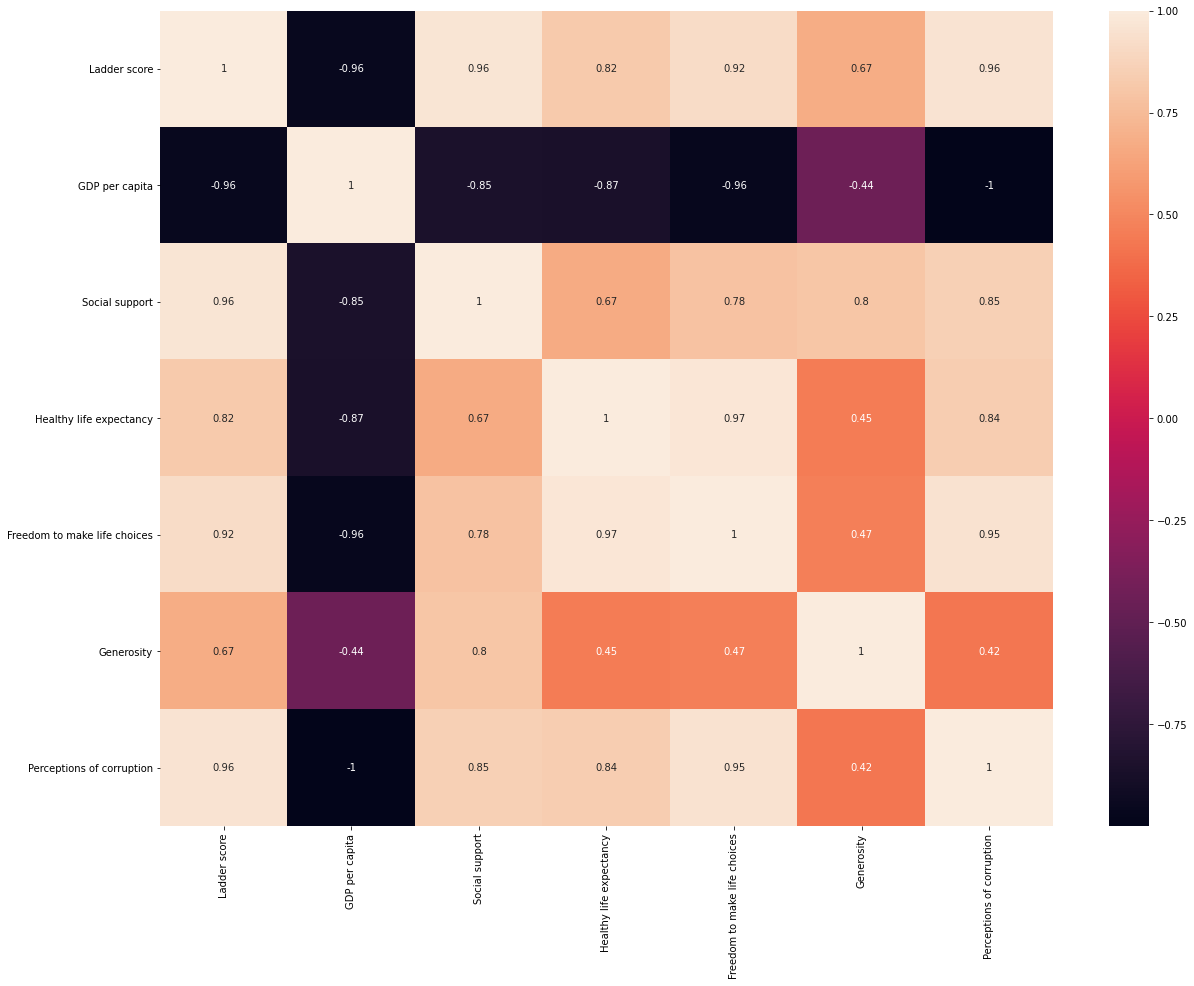

In [ ]:
corrMatrix = NA2021.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

# World Happiness Report 2019

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
whr2019 = pd.read_csv("/content/drive/Shareddrives/IST652|738 Happiness Scripting Project/world-happiness-report-2019.csv")
whr2019 = whr2019.drop(columns=['Overall rank'])
whr2019

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Which countries are the most and least happy in 2019

In [ ]:
happiest2019 = whr2019.groupby(['Country or region','Healthy life expectancy','Freedom to make life choices','Generosity'])['Score'].mean().sort_values(ascending=False)[:10]
leasthappy2019 = whr2019.groupby(['Country or region','Healthy life expectancy','Freedom to make life choices','Generosity'])['Score'].mean().sort_values(ascending=True)[:10]

In [ ]:
happiest2019

Country or region  Healthy life expectancy  Freedom to make life choices  Generosity
Finland            0.986                    0.596                         0.153         7.769
Denmark            0.996                    0.592                         0.252         7.600
Norway             1.028                    0.603                         0.271         7.554
Iceland            1.026                    0.591                         0.354         7.494
Netherlands        0.999                    0.557                         0.322         7.488
Switzerland        1.052                    0.572                         0.263         7.480
Sweden             1.009                    0.574                         0.267         7.343
New Zealand        1.026                    0.585                         0.330         7.307
Canada             1.039                    0.584                         0.285         7.278
Austria            1.016                    0.532                    

In [ ]:
leasthappy2019

Country or region         Healthy life expectancy  Freedom to make life choices  Generosity
South Sudan               0.295                    0.010                         0.202         2.853
Central African Republic  0.105                    0.225                         0.235         3.083
Afghanistan               0.361                    0.000                         0.158         3.203
Tanzania                  0.499                    0.417                         0.276         3.231
Rwanda                    0.614                    0.555                         0.217         3.334
Yemen                     0.463                    0.143                         0.108         3.380
Malawi                    0.495                    0.443                         0.218         3.410
Syria                     0.440                    0.013                         0.331         3.462
Botswana                  0.538                    0.455                         0.025         3.488

In [ ]:
longlife2019 = whr2019.groupby(['Country or region','Freedom to make life choices','Generosity','Score'])['Healthy life expectancy'].mean().sort_values(ascending=False)[:10]
shortlife2019 = whr2019.groupby(['Country or region','Healthy life expectancy','Freedom to make life choices','Generosity', 'Score'])['Healthy life expectancy'].mean().sort_values(ascending=True)[:10]

In [ ]:
longlife2019

Country or region  Freedom to make life choices  Generosity  Score
Singapore          0.556                         0.271       6.262    1.141
Hong Kong          0.440                         0.258       5.430    1.122
Japan              0.445                         0.069       5.886    1.088
Spain              0.362                         0.153       6.354    1.062
Switzerland        0.572                         0.263       7.480    1.052
France             0.436                         0.111       6.592    1.045
Cyprus             0.406                         0.190       6.046    1.042
Northern Cyprus    0.417                         0.191       5.718    1.042
Canada             0.584                         0.285       7.278    1.039
Italy              0.231                         0.158       6.223    1.039
Name: Healthy life expectancy, dtype: float64

In [ ]:
shortlife2019

Country or region         Healthy life expectancy  Freedom to make life choices  Generosity  Score
Swaziland                 0.000                    0.313                         0.074       4.212    0.000
Central African Republic  0.105                    0.225                         0.235       3.083    0.105
Lesotho                   0.168                    0.359                         0.107       3.802    0.168
Chad                      0.192                    0.174                         0.198       4.350    0.192
Ivory Coast               0.232                    0.352                         0.154       4.944    0.232
Sierra Leone              0.242                    0.309                         0.252       4.374    0.242
Nigeria                   0.245                    0.426                         0.215       5.265    0.245
Somalia                   0.268                    0.559                         0.243       4.668    0.268
South Sudan               0.295      

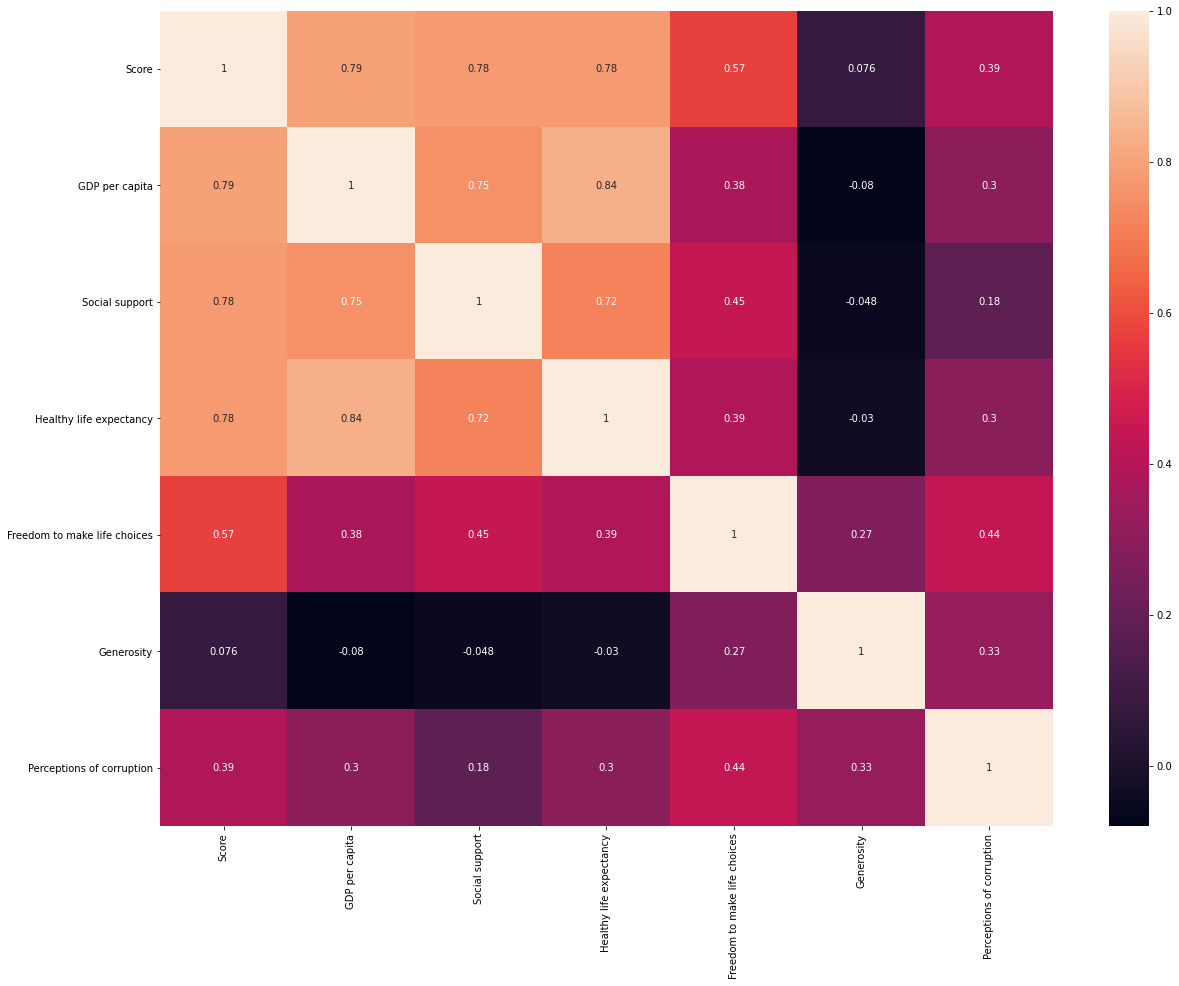

In [ ]:
corrMatrix = whr2019.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

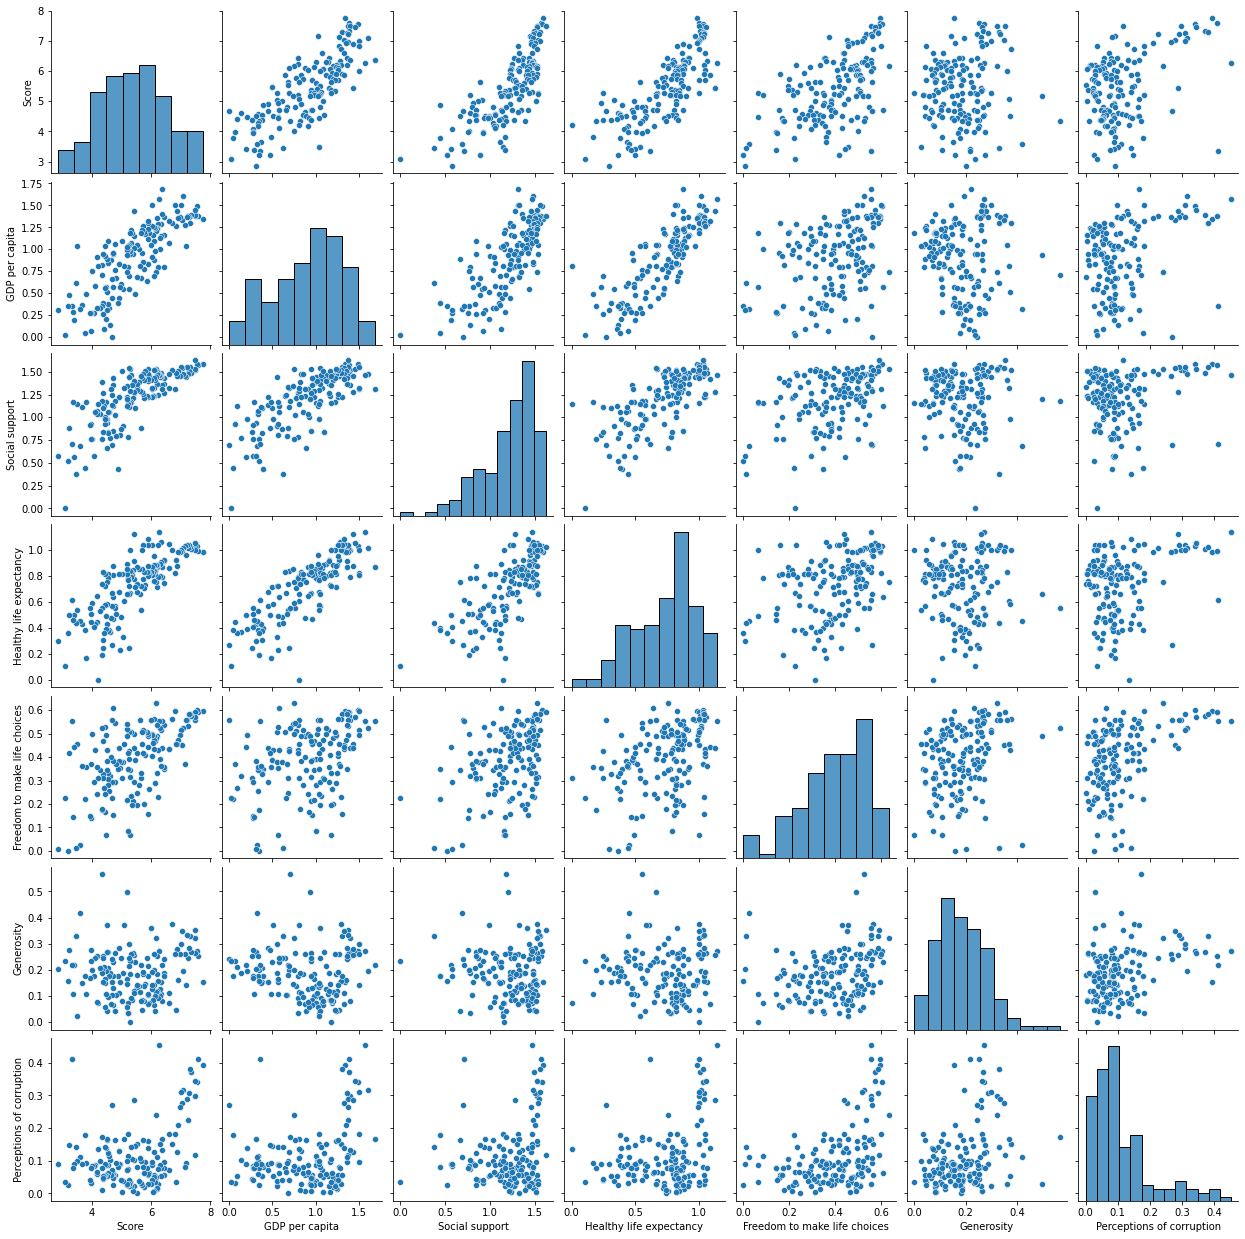

In [ ]:
sns.pairplot(whr2019)

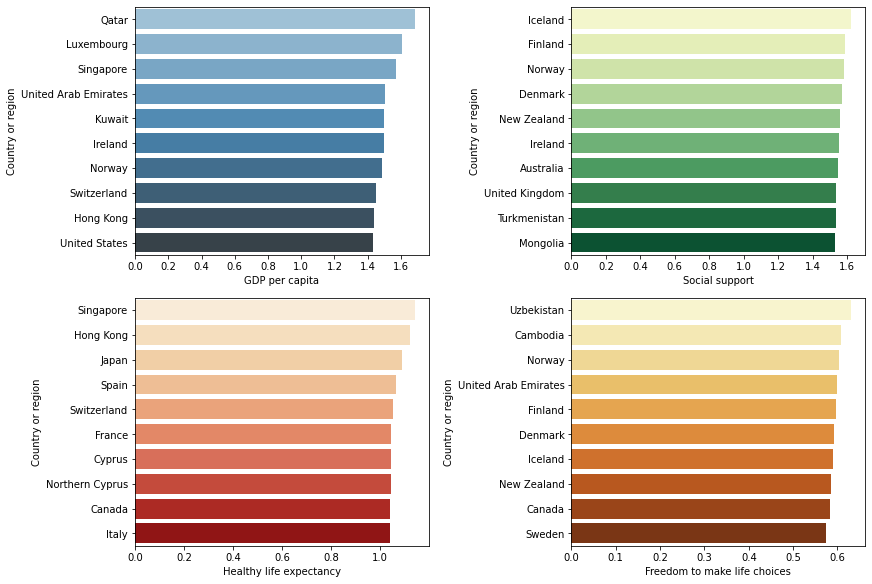

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=whr2019.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=whr2019.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=whr2019.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=whr2019.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = whr2019['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = whr2019['Score'], 
           text = whr2019['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Create a region for NA as seen in 2021 

In [ ]:
NA2019 = whr2019.loc[(whr2019['Country or region'] == 'New Zealand')|(whr2019['Country or region'] == 'Australia')|(whr2019['Country or region'] == 'Canada')|(whr2019['Country or region'] == 'United States')]

In [ ]:
nahappiest2019 = NA2019.groupby(['Country or region','GDP per capita', 'Social support', 'Healthy life expectancy',])['Score'].mean().sort_values(ascending=False)
nahappiest2019

Country or region  GDP per capita  Social support  Healthy life expectancy
New Zealand        1.303           1.557           1.026                      7.307
Canada             1.365           1.505           1.039                      7.278
Australia          1.372           1.548           1.036                      7.228
United States      1.433           1.457           0.874                      6.892
Name: Score, dtype: float64

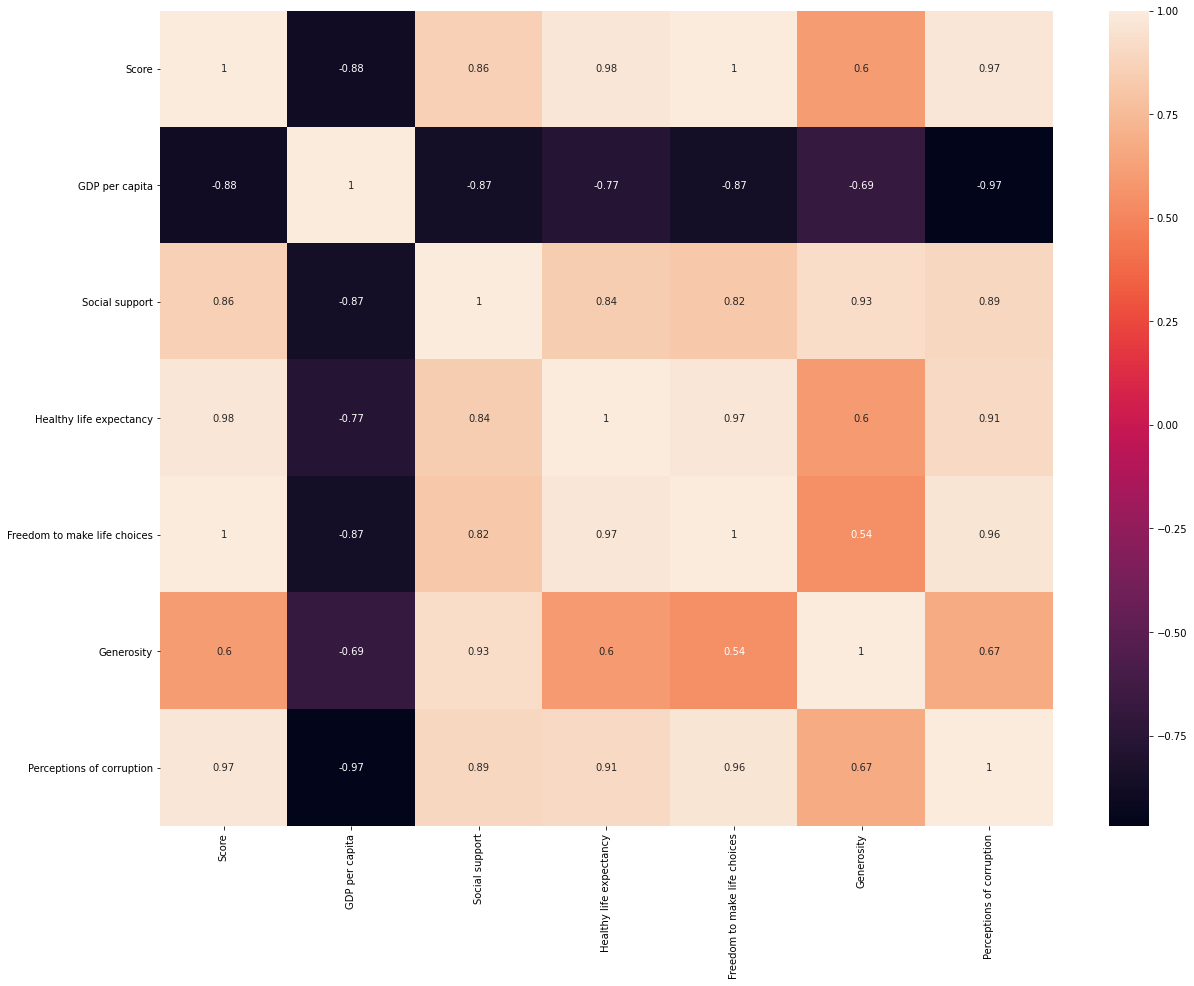

In [ ]:
corrMatrix = NA2019.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

In [ ]:
pip install plotly

In [ ]:
import numpy as np 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
df2019 = whr2019.iloc[:20,:]
df2021 = whr2021.iloc[:20,:]

trace2019 =go.Scatter(
                    x = df2019['Country or region'],
                    y = df2019['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'black'),
                    text= df2019['Country or region'])

# creating trace5
trace2021 =go.Scatter(
                    x = df2019['Country or region'],
                    y = df2021['Ladder score'],
                    mode = "markers",
                    name = "2021",
                    marker = dict(color = 'pink'),
                    text= df2021['Country name'])

data = [trace2019, trace2021]
layout = dict(title = 'Happiness Rate Changing 2019 to 2021 for Top 20 Countries',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
# Creating trace1
trace1 = go.Scatter(x = df2019['Country or region'],
                    y = df2019['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df2019['Country or region'])

# Creating trace2
trace2 = go.Scatter(x = df2019['Country or region'],
                    y = df2019['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df2019['Country or region'])

# Creating trace3
trace3 = go.Scatter(x = df2019['Country or region'],
                    y = df2019['Social support'],
                    mode = "lines+markers",
                    name = "Social support",
                    marker = dict(color = 'green'),
                    text= df2019['Country or region'])

# Creating trace4
trace4 = go.Scatter(x = df2019['Country or region'],
                    y = df2019['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Perceptions of corruption",
                    marker = dict(color = 'black'),
                    text= df2019['Country or region'])

# Creating trace5
trace5 = go.Scatter(x = df2019['Country or region'],
                    y = df2019['Healthy life expectancy'],
                    mode = "lines+markers",
                    name = "Life Expectancy",
                    marker = dict(color = 'orange'),
                    text= df2019['Country or region'])

data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Economy - Freedom - Social Support - Perceptions of Corruption Values - Life Expectancy Comparision in 2019 for First 20 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x")
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
# Creating trace1
trace1 = go.Scatter(x = df2021['Country name'],
                    y = df2021['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df2021['Country name'])

# Creating trace2
trace2 = go.Scatter(x = df2021['Country name'],
                    y = df2021['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df2021['Country name'])

# Creating trace3
trace3 = go.Scatter(x = df2021['Country name'],
                    y = df2021['Social support'],
                    mode = "lines+markers",
                    name = "Social support",
                    marker = dict(color = 'green'),
                    text= df2021['Country name'])

# Creating trace4
trace4 = go.Scatter(x = df2021['Country name'],
                    y = df2021['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Perceptions of corruption",
                    marker = dict(color = 'black'),
                    text= df2021['Country name'])

# Creating trace5
trace5 = go.Scatter(x = df2021['Country name'],
                    y = df2021['Healthy life expectancy'],
                    mode = "lines+markers",
                    name = "Life Expectancy",
                    marker = dict(color = 'orange'),
                    text= df2021['Country name'])

data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Economy - Freedom - Social Support - Perceptions of Corruption - Life Expectancy Values Comparision in 2021 for First 20 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x")
fig = dict(data = data, layout = layout)
iplot(fig)

####Linear Regression Models

In [ ]:
#Import packages for linear regressions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#Create a new dataframe with pandas from original data
#Use only Strongly correlated variables to Ladder score
LGDF = pd.DataFrame(data = whr2021, columns=['Ladder score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption'])
#Rename variavles/columns to use in regressions
LGDF = LGDF.rename(columns={"Ladder score":"Ladder_score","GDP per capita":"GDP_per_capita","Social support":"Social_support","Healthy life expectancy":"Healthy_life_expectancy","Freedom to make life choices":"Freedom_to_make_life_choices","Perceptions of corruption":"Perceptions_of_corruption"})
#Convert column data types to float for regression models
LGDF = LGDF.astype(float)
LGDF.dtypes
#Show dataframe
LGDF

,Ladder_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption
0,7.842,1.446,1.106,0.741,0.691,0.481
1,7.620,1.502,1.108,0.763,0.686,0.485
2,7.571,1.566,1.079,0.816,0.653,0.413
3,7.554,1.482,1.172,0.772,0.698,0.170
4,7.464,1.501,1.079,0.753,0.647,0.384
...,...,...,...,...,...,...
144,3.512,0.451,0.731,0.007,0.405,0.015
145,3.467,1.099,0.724,0.340,0.539,0.088
146,3.415,0.364,0.202,0.407,0.627,0.493
147,3.145,0.457,0.649,0.243,0.359,0.075


In [ ]:
#Split data for models
train, test = train_test_split(LGDF, test_size=0.2, random_state=1, shuffle=True)

X_train = pd.DataFrame(train.iloc[:,1:6])
Y_train = pd.DataFrame(train.iloc[:,0])
X_test = pd.DataFrame(test.iloc[:,1:6])
Y_test = pd.DataFrame(test.iloc[:,0])

In [ ]:
#Linear Regression using Sklearn
LG1 = LinearRegression().fit(X_train, Y_train)
#Check Score on Training 
LG1.score(X_train, Y_train)

0.7862163407510281

In [ ]:
#Predict Using first model (LG1)
Predict_1 = pd.DataFrame(LG1.predict(X_test))
#Compare in DataFrame
Y_test = Y_test.reset_index(drop=True)
Predict_vs_Actual = pd.concat([Predict_1, Y_test], axis=1)
Predict_vs_Actual = Predict_vs_Actual.rename(columns={0:"Predicted Score","Ladder_score":"Actual Score"})
Predict_vs_Actual

,Predicted Score,Actual Score
0,5.505326,3.467
1,5.869726,5.171
2,5.514118,5.972
3,5.347383,5.466
4,4.408266,5.306
5,4.595310,4.918
6,4.435249,5.132
7,5.915721,5.985
8,6.261933,6.152
9,5.909227,5.882


In [ ]:
#Metrics from Sklearn
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Predict_1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Predict_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Predict_1)))

Mean Absolute Error: 0.49817786331490077
Mean Squared Error: 0.40731231427524334
Root Mean Squared Error: 0.6382102430040145


Text(0.5, 0, 'Sample')

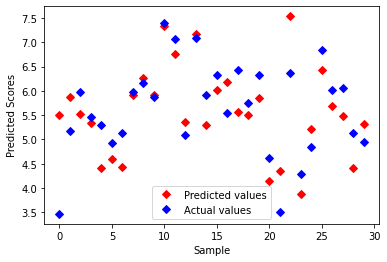

In [ ]:
#Graph showing predicted vs actual values
plt.figure()
plt.plot(Predict_1,'Dr',label='Predicted values')
plt.plot(Y_test,'Db',label='Actual values')
plt.legend(loc="best")
plt.ylabel('Predicted Scores')
plt.xlabel('Sample')

In [ ]:
#Import more packages for another type of linear regression model
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#model structure
model1 = str( 'Ladder_score ~ GDP_per_capita + Social_support + Healthy_life_expectancy + Freedom_to_make_life_choices + Perceptions_of_corruption')

In [ ]:
## Model 1 on Training and Testing(fitted)
train_model1 = smf.ols(model1, data = LGDF).fit()
print(train_model1.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder_score   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     87.50
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           9.60e-42
Time:                        05:49:54   Log-Likelihood:                -117.17
No. Observations:                 149   AIC:                             246.3
Df Residuals:                     143   BIC:                             264.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
# training set predictions
X_train['Predicted_score'] = train_model1.fittedvalues

# test set predictions
X_test['Predicted_score'] = train_model1.predict(X_test)

In [ ]:
X_test

,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Predicted_score
145,1.099,0.724,0.340,0.539,0.088,5.400935
89,1.025,0.841,0.541,0.526,0.276,5.836707
54,0.693,0.904,0.604,0.553,0.176,5.657449
77,0.508,0.895,0.498,0.548,0.247,5.474299
84,0.669,0.409,0.052,0.438,0.092,4.284172
105,0.792,0.219,0.558,0.477,0.088,4.702280
91,0.518,0.558,0.357,0.381,0.088,4.516355
53,1.107,0.957,0.596,0.611,0.028,5.968430
44,1.230,1.103,0.527,0.573,0.132,6.201513
59,1.251,1.039,0.703,0.453,0.000,5.961968


In [ ]:
#model structure using only 3 variables compared to the last one. Taking out the least significant variables.
model2 = str( 'Ladder_score ~ GDP_per_capita + Social_support + Freedom_to_make_life_choices')

In [ ]:
## Model 2 on Training and Testing(fitted)
train_model2 = smf.ols(model2, data = LGDF).fit()
print(train_model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder_score   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.95e-41
Time:                        05:50:55   Log-Likelihood:                -123.05
No. Observations:                 149   AIC:                             254.1
Df Residuals:                     145   BIC:                             266.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
import os
!pip install twint
!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/
!pip3 install . -r requirements.txt
%cd ..

Install twint into the proper python directory so google colab is able to read it. 

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


download all the packages necessary to read tweets, create word plots, graph findings, and run VADER

In [ ]:
c = twint.Config()
c.Search = '#covid'
c.Limit = 500
c.Pandas = True
twint.run.Search(c)
df = twint.storage.panda.Tweets_df
df = df.loc[df['language'] == 'en']
df['tweet'] = df['tweet'].str.replace('COVID19','')
df['tweet'] = df['tweet'].str.replace('COVID','')
df['tweet'] = df['tweet'].str.replace('Covid','')
df['tweet'] = df['tweet'].str.replace('co','')
df['tweet'] = df['tweet'].str.replace('https','')
df['tweet'] = df['tweet'].str.replace('WorldHappinessReport','')
df['tweet'] = df['tweet'].str.replace('Coronavirus','')
df['tweet'] = df['tweet'].str.replace('ronavirus','')
df['tweet'] = df['tweet'].str.replace('rona','')

df.head()

1402739841000001538 2021-06-09 21:30:14 +0000 <hood_medicine> Gangrene, Hearing Loss Show #Delta #COVID Variant May Be More Severe.    https://t.co/TZ0OGdgMVP  #HoodMedicine #GetVaccinated  #SaveTheHood  #ProtectYaNeck  #TrustScience #PublicHealthGuerrillas 🦍
1402739833622106112 2021-06-09 21:30:12 +0000 <RadioMariaArg> ¿Qué es la #NieblaMental y que relación tiene el incremento de casos en pacientes recuperados de #Covid? Para conocer sobre esta secuela y las investigaciones que se están realizando al respecto, dialogamos Fátima González Palau, doctora en Neuropsicología  https://t.co/fPhGwkFmqR
1402739781776273408 2021-06-09 21:30:00 +0000 <Telearagua> #Infórmate📢 | En la batalla por la salud y la vida en contra del #Covid-19 por ti y por los tuyos ten en cuenta las siguientes recomendaciones:     -Usa mascarilla.   -Usa guantes.  -Usa gel antibacteriano o lávate las manos.  -Evita el contacto directo.  #CaminoACarabobo  https://t.co/tkVTVP9Isr
1402739682157473800 2021-06-09 21:29:36

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1402739841000001538,1402739841000001538,1.623274e+12,2021-06-09 21:30:14,+0000,,"Gangrene, Hearing Loss Show #Delta # Variant M...",en,"[delta, covid, hoodmedicine, getvaccinated, sa...",[],1270557418896986115,1270557418896986115,hood_medicine,Hood Medicine Initiative 😷✊🏾,3,21,https://twitter.com/hood_medicine/status/14027...,[https://www.bloomberg.com/news/articles/2021-...,[],0,,False,0,0,0,,#covid,,,,,,,[],,,,
3,1402739682157473800,1402738070387150852,1.623274e+12,2021-06-09 21:29:36,+0000,,@grantshapps @goonhillyorg Probably find a new...,en,"[covid, variant]",[],256618357,256618357,jrhodeswinsor,James Rhodes-Winsor,3,21,https://twitter.com/jrhodeswinsor/status/14027...,[],[],0,,False,0,0,0,,#covid,,,,,,,"[{'screen_name': 'grantshapps', 'name': 'Rt Ho...",,,,
7,1402739325830418432,1402739325830418432,1.623274e+12,2021-06-09 21:28:11,+0000,,"Lions, Tigers, Vaccines, Oh My! It was a wild ...",en,[covid],[],47702599,47702599,ChildrensOmaha,Children's,3,21,https://twitter.com/ChildrensOmaha/status/1402...,[],[https://pbs.twimg.com/media/E3eH-q2XwAE1JNK.j...,1,https://pbs.twimg.com/media/E3eH-q2XwAE1JNK.jpg,False,0,0,0,,#covid,,,,,,,[],,,,
8,1402739311351533572,1402739311351533572,1.623274e+12,2021-06-09 21:28:08,+0000,,I hope the nspiracy theorists and nutjobs goin...,en,"[melbourne, covid, covid19aus, covid19vic]",[],411929085,411929085,TheSydneyWolf,Wolf,3,21,https://twitter.com/TheSydneyWolf/status/14027...,[],[],0,,False,0,0,0,,#covid,,,,,,,[],,,,
9,1402739201003724803,1402739201003724803,1.623274e+12,2021-06-09 21:27:41,+0000,,://t./XXY4ZboMF0 absolutely amazing video by ...,en,[covid],[],1096335506395357184,1096335506395357184,SamGJude,Samuel Jude,3,21,https://twitter.com/SamGJude/status/1402739201...,[https://youtu.be/FTUNFHgc4cU],[https://pbs.twimg.com/tweet_video_thumb/E3eH3...,1,https://pbs.twimg.com/tweet_video_thumb/E3eH3X...,False,0,0,0,,#covid,,,,,,,[],,,,


Gather the first 500 tweets about #covid. remove certain words relating to the hashtag and keep only tweets written in english.

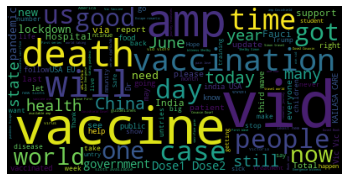

In [ ]:
texts = df['tweet'].values 
wordcloud1 = WordCloud().generate(str(texts))
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

wordcloud for #covid

In [ ]:
c = twint.Config()
c.Search = '#WorldHappinessReport'
c.Limit = 500
c.Pandas = True
twint.run.Search(c)
df_WHR = twint.storage.panda.Tweets_df
df_WHR = df_WHR.loc[df_WHR['language'] == 'en']
df_WHR['tweet'] = df_WHR['tweet'].str.replace('COVID19','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('COVID','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('Covid','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('co','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('https','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('WorldHappinessReport','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('worldhappinessreport','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('World Happiness','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('WorldHappinessDay','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('Happiness','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('happiness','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('happy','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('Coronavirus','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('ronavirus','')
df_WHR['tweet'] = df_WHR['tweet'].str.replace('rona','')

df_WHR.head()

Pulling in tweets for #world happiness report. remove certain words relating to the hashtag and keep only tweets written in english.

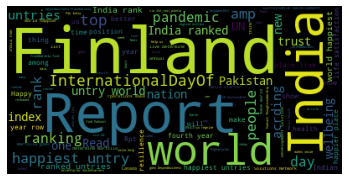

In [ ]:
texts_WHR = df_WHR['tweet'].values 
wordcloud2 = WordCloud().generate(str(texts_WHR))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Word cloud for #worldhappinessreport

In [ ]:
c = twint.Config()
c.Search = '#2019'
c.Limit = 500
c.Pandas = True
twint.run.Search(c)
df_2019 = twint.storage.panda.Tweets_df
df_2019 = df_2019.loc[df_2019['language'] == 'en']
df_2019['tweet'] = df_2019['tweet'].str.replace('2019','')
df_2019['tweet'] = df_2019['tweet'].str.replace('co','')
df_2019['tweet'] = df_2019['tweet'].str.replace('https','')

df_2019.head()

Pulling in tweets for #2019. remove certain words relating to the hashtag and keep only tweets written in english.

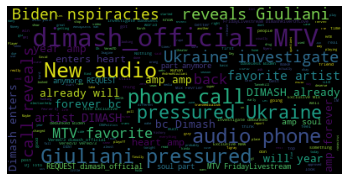

In [ ]:
texts_2019 = df_2019['tweet'].values 
wordcloud3 = WordCloud().generate(str(texts_2019))
# Generate plot
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

Word cloud for #2019

In [ ]:
c = twint.Config()
c.Search = '#2021'
c.Limit = 500
c.Pandas = True
twint.run.Search(c)
df_2021 = twint.storage.panda.Tweets_df
df_2021 = df_2021.loc[df_2021['language'] == 'en']
df_2021['tweet'] = df_2021['tweet'].str.replace('2021','')
df_2021['tweet'] = df_2021['tweet'].str.replace('co','')
df_2021['tweet'] = df_2021['tweet'].str.replace('https','')

df_2021.head()

Pulling tweets for #2021. remove certain words relating to the hashtag and keep only tweets written in english.

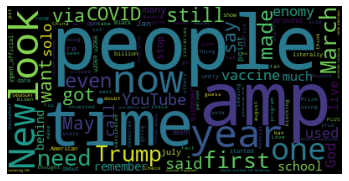

In [ ]:
texts_2021 = df_2021['tweet'].values 
wordcloud4 = WordCloud().generate(str(texts_2021))
# Generate plot
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

word cloud for 2021

In [ ]:
sid = SentimentIntensityAnalyzer()
df['scores'] = df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_WHR['scores'] = df_WHR['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
df_WHR['compound']  = df_WHR['scores'].apply(lambda score_dict: score_dict['compound'])
df_WHR['comp_score'] = df_WHR['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_2019['scores'] = df_2019['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
df_2019['compound']  = df_2019['scores'].apply(lambda score_dict: score_dict['compound'])
df_2019['comp_score'] = df_2019['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_2021['scores'] = df_2021['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
df_2021['compound']  = df_2021['scores'].apply(lambda score_dict: score_dict['compound'])
df_2021['comp_score'] = df_2021['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')


Sentiment analysis using vader for #covid. Splitting up the polarity into coumpound scores, and then calculating the overall sentiment (positive/negative)

0       {'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'compound': -0.6361}
3        {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404}
7        {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.5255}
8        {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.6542}
9      {'neg': 0.096, 'neu': 0.703, 'pos': 0.201, 'compound': 0.5413}
                                    ...                              
587    {'neg': 0.23, 'neu': 0.638, 'pos': 0.132, 'compound': -0.3182}
588      {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.7717}
591     {'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.3818}
594      {'neg': 0.105, 'neu': 0.732, 'pos': 0.164, 'compound': 0.34}
595             {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Name: scores, Length: 305, dtype: object


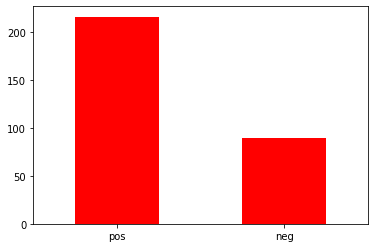

In [ ]:
pd.set_option('display.max_colwidth',1000)
df['comp_score'].value_counts().plot(kind='bar', rot=0, color='red')
print(df['scores'])

Positive vs negative tweets for #covid

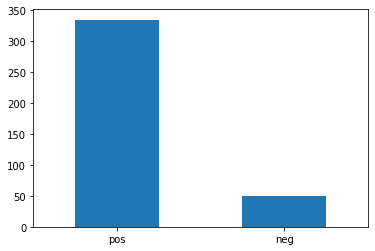

In [ ]:
df_WHR['comp_score'].value_counts().plot(kind='bar', rot=0)

Positive vs negative tweets for #world happiness report

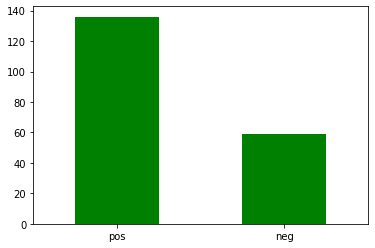

In [ ]:
df_2019['comp_score'].value_counts().plot(kind='bar', rot=0, color = 'green')

Positive vs negative tweets for #2019

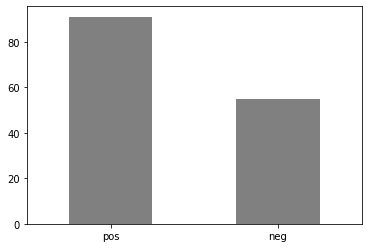

In [ ]:
df_2021['comp_score'].value_counts().plot(kind='bar', rot=0, color = 'gray')

Positive vs negative tweets for #2021